In [1]:
import mmcv
from mmcv.runner import load_checkpoint

c:\ProgramData\anaconda3\envs\mmrotate-test\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
from mmdet.apis import inference_detector, show_result_pyplot
from mmrotate.models import build_detector

In [4]:
config_file = 'configs\custom\custom_roi_transformer.py'
checkpoint_file = 'work_dirs\custom_roi_transformer\latest.pth'


# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config_file)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint_file, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

c:\ProgramData\anaconda3\envs\mmrotate-test\lib\site-packages\mmdet\models\dense_heads\anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


load checkpoint from local path: work_dirs\custom_roi_transformer\latest.pth


RoITransformer(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

In [11]:
!ls

CITATION.cff
LICENSE
LV-Overhead-Pole_East-Sussex_50-97225907072917_-0-012122295486015745_png.rf.a73aa569b600e8c859a225cd512010a0.jpg
LV-Overhead-Pole_Essex_51-52460433602464_-0-5863233814442385_png.rf.dd4d42f0077a53f560d0f65811d299c6.jpg
MANIFEST.in
README.md
README_zh-CN.md
bok.py
configs
demo
docker
docs
inference.ipynb
losses.pdf
mmrotate
mmrotate.egg-info
model-index.yml
oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth
oriented_rcnn_r50_fpn_1x_dota_le90.py
re_resnet50_c8_batch256-25b16846.pth
requirements
requirements.txt
resources
result.jpg
setup.cfg
setup.py
test_53.0077778_-2.21.png
tests
tools
work_dir
work_dirs


In [15]:
#img = 'C:/Users/CanAliYarman/Downloads/test-20240807T174834Z-001/test/images/UTLPOLE_38-9587896496459_-77-0126941075809_png.rf.34bb1f01c188faea624e1b4dfa4ee1d8.jpg'
img = './LV-Overhead-Pole_Essex_51-52460433602464_-0-5863233814442385_png.rf.dd4d42f0077a53f560d0f65811d299c6.jpg'
result = inference_detector(model, img)

In [14]:
result

[array([[4.6583e+02, 4.0164e+02, 1.9189e+01, 1.0524e+01, 1.5338e+00, 2.5993e-01]], dtype=float32)]

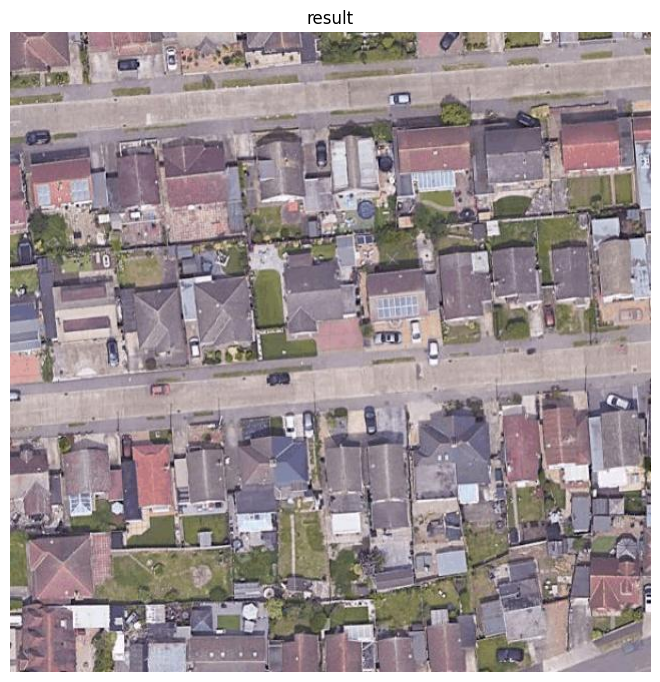

In [16]:
show_result_pyplot(model, img, result, score_thr=0.03, palette='dota')